# **Visualize Data**





In [19]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [20]:
import numpy as np
import pandas as pd
from collections.abc import Callable
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 12)

Vector = np.array
Matrix = np.array
Function = Callable[[float, Vector], Vector]

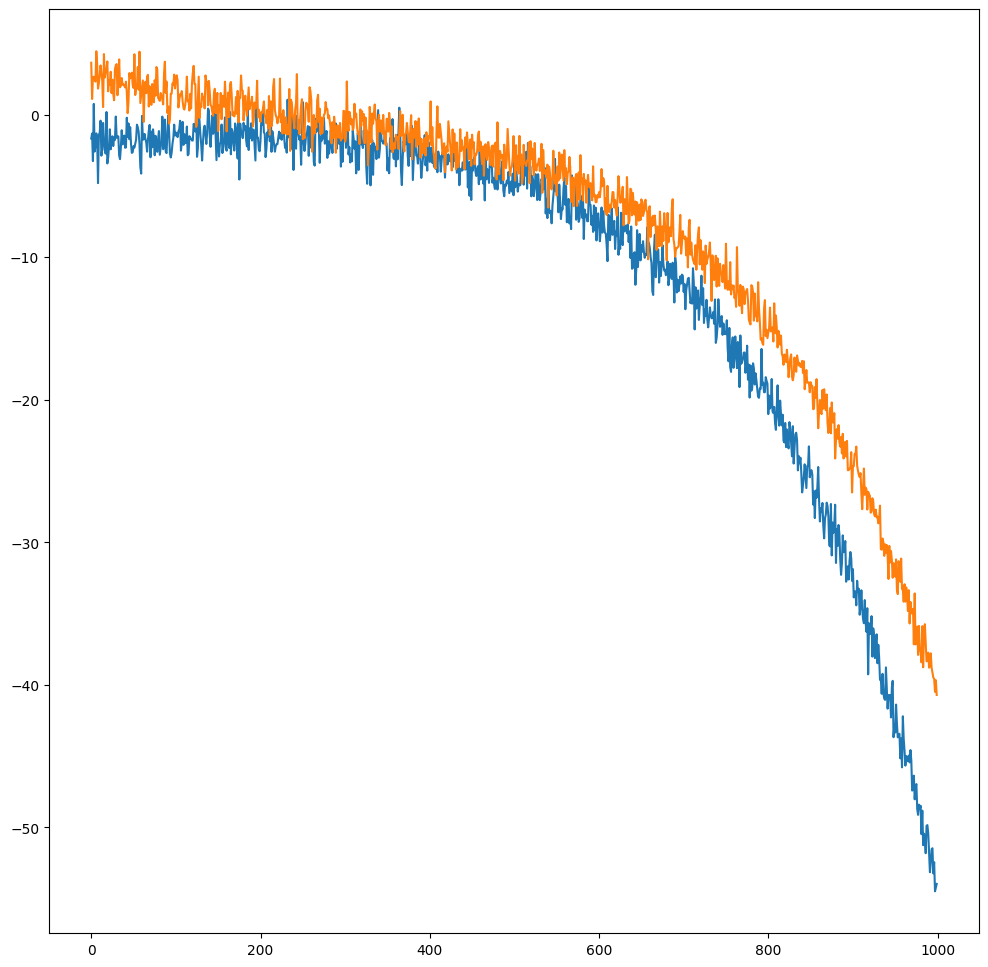

In [21]:
### Note: You need to change path for "exact.xlsx" based on your path

df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/exact.xlsx",  usecols=['R', 'J']) #in the excel file, we deleted the order column
plt.plot(df)
plt.show()

y = df.to_numpy() # Convert to numpy
R = y[:,0]
J = y[:,1]



# **Remove Noise From Data**


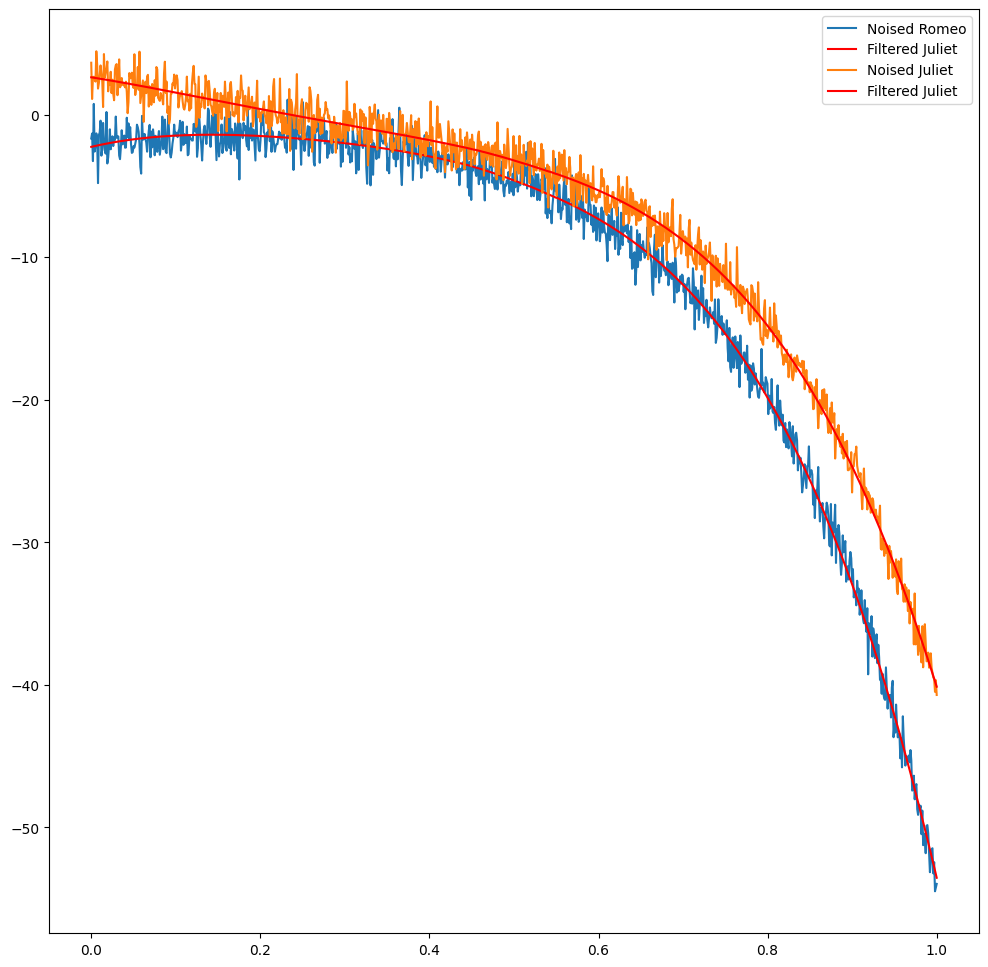

In [22]:
# Remove noise
from scipy.signal import savgol_filter
t = np.linspace(0,1,1000)
R_filtered = savgol_filter(R, window_length=900, polyorder=4)
J_filtered = savgol_filter(J, window_length=900, polyorder=4)
# Plot the original and filtered data
plt.plot(t, R, label='Noised Romeo')
plt.plot(t, R_filtered, label='Filtered Juliet',color = 'r')
plt.plot(t, J, label='Noised Juliet')
plt.plot(t, J_filtered, label='Filtered Juliet',color = 'r')

plt.legend()
plt.show()
## Now we have R and J filtered


In [23]:
# Explicit Euler function
def explicit_euler(A: Matrix, x: Vector, h: float) -> Vector:
  """
  The approximate of the exact solution to the ODE dx/dt = f(t, x) at
  time t + h, x is the value of the solution at time t, h is the time step

  t: real number
  h: real number
  x: 2-dimensional real vector
  f: 2-dimensional real-vector-valued function 
  """
  x_next = x + h * np.matmul(A,x)
  return x_next

# **Gradient Descent and Loss Function**

In [24]:
# Loss Function
def loss_function(Predict:Matrix,Target:Matrix):
    loss = np.power(Predict - Target,2)
    loss = np.sum(loss)
    loss = loss/(2*numData)
    return loss
# Gradient Descent
def computeGrad(Predict:Matrix,Target:Matrix, Previous : Matrix):
  grad = np.subtract(Predict,Target)
  grad = np.matmul(Previous.transpose(),grad)
  grad = (h/numData) * grad
  return grad

# **Set up parameter for Regression**

In [32]:
# Set up
h = 0.001
iterations = 10000
learning_rate = 0.003
T = np.hstack((R_filtered.reshape(-1,1), J_filtered.reshape(-1,1))) # Target values after filter
numData = len(T[:,0])
print(T.shape)
# Initialize matrix A
A = np.array([[2,3],[4,-2]], dtype = 'f')
initial_value =  np.array([[-2,3]])
A.shape

(1000, 2)


(2, 2)

In [26]:

lossHistory = np.zeros(iterations)
for i in range(0,iterations): #iteration 
  P = np.zeros((1000, 2)) # Predict values for each iteration
  x  = np.array([-2,3],ndmin =2,dtype = 'f').transpose() # Initial values x0
  for m in range(0,1000): 
    x_next = explicit_euler(A,x,h)
    P[m] = x_next.transpose()
    x = x_next
  lossHistory[i] = loss_function(P,T) # Compute loss each iteration
  P_previous = np.insert(P[0:999,:], 0, initial_value, axis=0)
  # Compute grad to update A matix for each iteration
  grad = computeGrad(P,T,P_previous)
  # Update coefficent  matrix A for new iteration 
  A = A - learning_rate * grad
  if i % 200 == 0:
    print("Iteration ",i," : ",lossHistory[i])
  if i == 6117:
    print("Coefficent Matrix: \n",A) 


Iteration  0  :  82.67639060895961
Iteration  200  :  77.87992629900239
Iteration  400  :  72.97952310787755
Iteration  600  :  68.00125377358863
Iteration  800  :  62.97685764769927
Iteration  1000  :  57.943922807985
Iteration  1200  :  52.945477178827716
Iteration  1400  :  48.02906111731202
Iteration  1600  :  43.245212188075634
Iteration  1800  :  38.64536013047677
Iteration  2000  :  34.279227291334436
Iteration  2200  :  30.191944123814945
Iteration  2400  :  26.42119512505234
Iteration  2600  :  22.994773776194293
Iteration  2800  :  19.928914198207323
Iteration  3000  :  17.227668193425984
Iteration  3200  :  14.88342360517588
Iteration  3400  :  12.878456600255912
Iteration  3600  :  11.187233889284883
Iteration  3800  :  9.779079694080437
Iteration  4000  :  8.620817044031346
Iteration  4200  :  7.679070791634124
Iteration  4400  :  6.9220441138446605
Iteration  4600  :  6.320709309643473
Iteration  4800  :  5.8494558915658335
Iteration  5000  :  5.4863002177708164
Iteration

**Result of Loss function and Plot Loss function**





Index at Minimumn of Loss Function:  6117
Min value of LossFunction 4.744417427983803






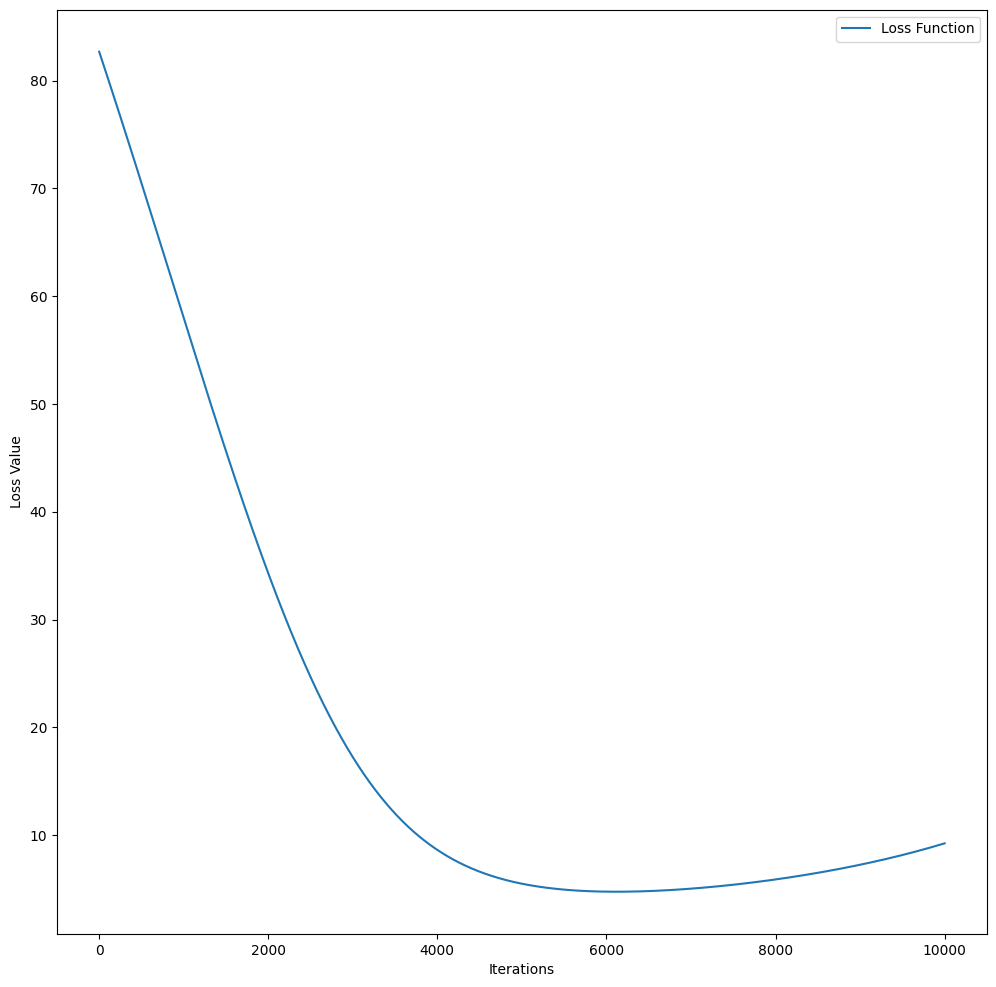

In [39]:
numIteration = np.linspace(1,iterations,iterations)

minValue = min(lossHistory)
index = np.argmin(lossHistory)
print("\n\n\n")
print("Index at Minimumn of Loss Function: ", index)

print("Min value of LossFunction", minValue)
print("\n\n\n")
plt.plot(numIteration, lossHistory,label ="Loss Function")
plt.xlabel("Iterations")
plt.ylabel("Loss Value")
plt.legend()
plt.show()

# **Test the final result of coefficent matrix A to generate exact solution**

In [28]:
from scipy.integrate import solve_ivp

# Define the ODE system
def func(t: float, x: Vector) -> Vector:#Do not change this example
  """
  The definition of 2-dimensional real-vector-valued
  function f(t, x) in the ODE dx/dt = f(t, x)

  t: real number
  x: 2-dimensional real vector satisfying the ODE
  """
  constant_case = Matrix([[2.9149887, 3.96222873], [4.59906882, -1.37722513]], dtype=float)
  return np.matmul(constant_case, x)

# Set initial conditions and time range
initial_val = [-2, 3]
t_span = [0, 1]
t = np.linspace(0,1,1000)
# Compute the solution
sol = solve_ivp(func, t_span, initial_val,t_eval=t,dense_output=True)

# Get the solution at specific times
print(sol)
y_values = sol.y




  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.001e-03 ...  9.990e-01  1.000e+00]
        y: [[-2.000e+00 -1.994e+00 ... -5.236e+01 -5.266e+01]
            [ 3.000e+00  2.987e+00 ... -3.470e+01 -3.490e+01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f2aec2632b0>
 t_events: None
 y_events: None
     nfev: 38
     njev: 0
      nlu: 0


In [29]:
R_exact = y_values[0,:]
J_exact = y_values[1,:]
y_values.shape
print(R_exact.shape)

(1000,)


# **Compare solution from Model and Provided Data**

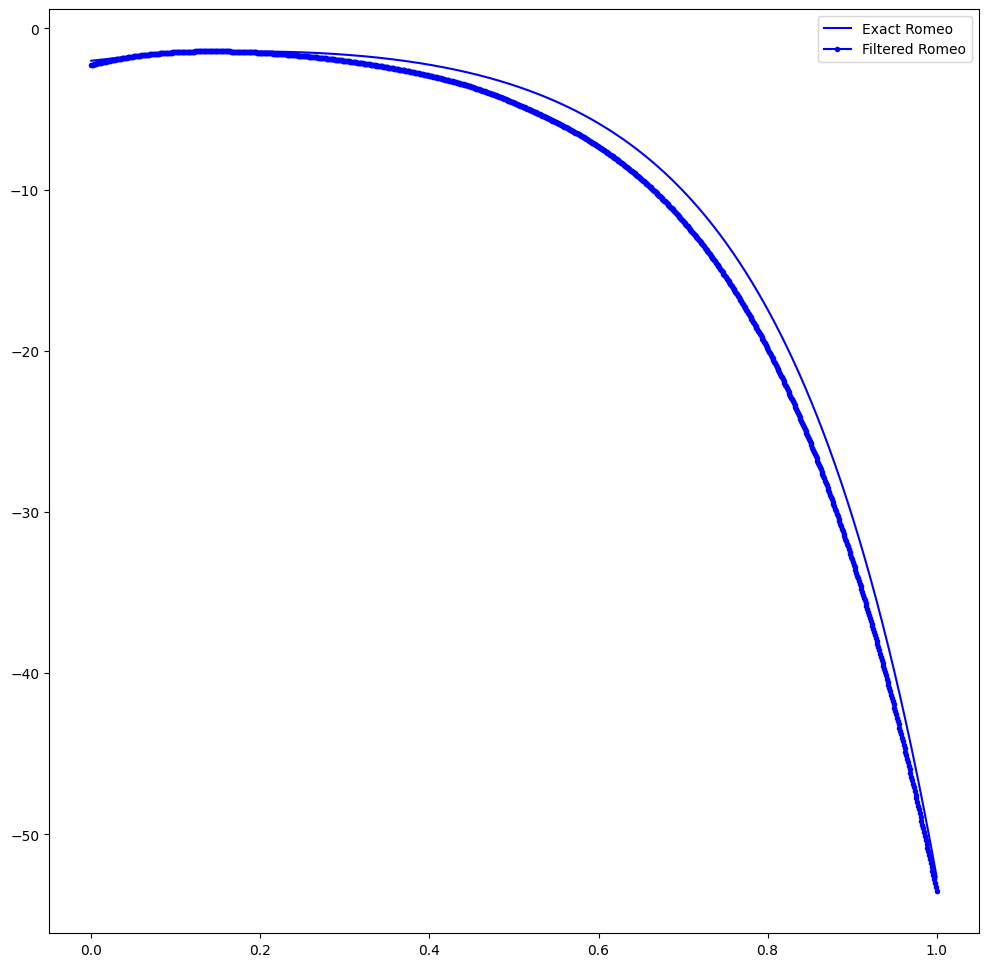

In [30]:
plt.plot(t, R_exact, label='Exact Romeo',color = 'b')
plt.plot(t, R_filtered, label='Filtered Romeo',color = 'b',marker = ".")
plt.legend()
plt.show()

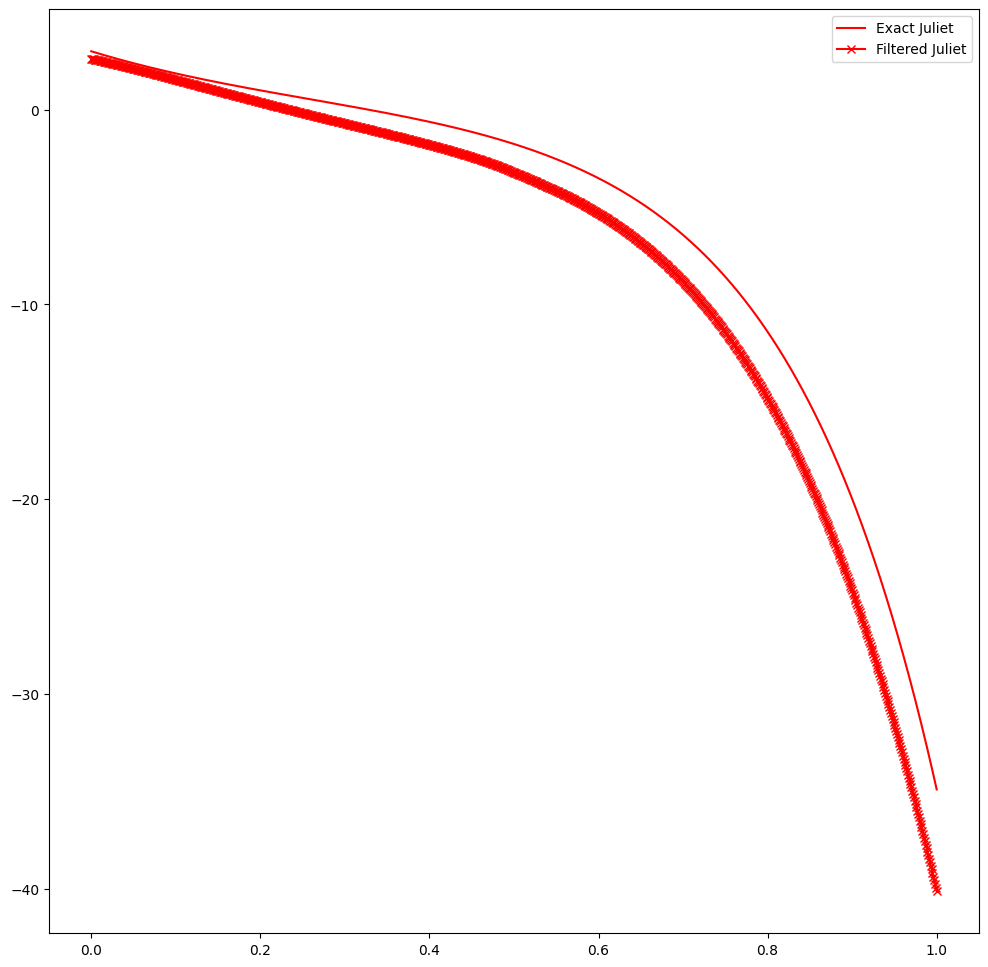

In [31]:
plt.plot(t, J_exact, label='Exact Juliet',color = 'r')
plt.plot(t, J_filtered, label='Filtered Juliet',color = 'r',marker = "x")
plt.legend()
plt.show()

# **Final Conclusion**
- In this exercises, we using Regession method and Gradient Descent Algorithm to find the best coefficent matrix A is:
- Coefficent Matrix: 
$A=\begin{pmatrix}2.9149887 & 3.96222873 \\ 4.59906882 & -1.37722513 \end{pmatrix}$
- Loss = 4.744417427983803
- We see that the shape between the graph from the exact solution of the coefficient matrix just found is quite similar to the data provided.
- So,  we conclude that the result of the coefficient matrix just found is an acceptable result